### 데이타 그룹연산 - Group by

In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt

In [ ]:
'''
groupby는 통계자료에서 굉장히 많이 사용한다.
그룹핑 시켜서 데이타의 합을 구하거나 평균치를 구하거나..등등
'''

In [2]:
np.random.seed(100)
df1 = DataFrame({
    'Gender':['Female', 'Male', 'Female', 'Male', 'Female', 'Male', 'Female', 'Female'],
    'Smoking':['Smoker', 'Smoker', 'Smoker', 'Non-Smoker', 'Non-Smoker', 'Non-Smoker', 'Non-Smoker', 'Smoker'],
    'CountA':np.random.randint(1,10,8),
    'CountB':np.random.randint(1,10,8)
})
df1

,Gender,Smoking,CountA,CountB
0,Female,Smoker,9,6
1,Male,Smoker,9,3
2,Female,Smoker,4,3
3,Male,Non-Smoker,8,3
4,Female,Non-Smoker,8,2
5,Male,Non-Smoker,1,1
6,Female,Non-Smoker,5,9
7,Female,Smoker,3,5


In [5]:
#groupby함수로 데이타를 그룹핑하면 DataFrameGroupBy 객체가 리턴된다..이 상태로는 아무것도 못함
df1.groupby('Gender')

In [6]:
# groupby함수로 그룹핑 했으면 반드시 통계함수를 적용시켜야 한다.
# Smoking은 Numeric한 컬럼이 아니어서 sum() 함수의 적용받지 못한다.
df1.groupby('Gender').sum()

,CountA,CountB
Gender,,
Female,29,25
Male,18,7


In [7]:
df1.groupby('Gender').max()

,Smoking,CountA,CountB
Gender,,,
Female,Smoker,9,9
Male,Smoker,9,3


In [9]:
# 그룹핑할때 2개이상 컬럼 가능...성별..흡연여부로 그룹핑...
df1.groupby(['Gender', 'Smoking']).sum()

CountA  CountB
Gender Smoking                   
Female Non-Smoker      13      11
       Smoker          16      14
Male   Non-Smoker       9       4
       Smoker           9       3

In [21]:
df1.groupby('Gender')['CountA'].sum() # 시리즈로 반환
df1.groupby('Gender')[['CountA']].sum() # 이쁘게

df1.groupby('Gender')['CountA'].agg('sum') # 시리즈로 반환

Gender
Female    29
Male      18
Name: CountA, dtype: int32

In [24]:
df1.groupby('Gender')[['CountA']].sum()
df1.groupby('Gender')['CountA'].agg(['sum'])

,sum
Gender,
Female,29
Male,18


In [25]:
# agg는 aggregation이라는 뜻으로 여러개의 함수를 동시에 사용해서 그룹할 수 있다.
df1.groupby('Gender')['CountA'].agg(['sum', 'mean', 'count'])

,sum,mean,count
Gender,,,
Female,29,5.8,5
Male,18,6.0,3


### 실전데이타 응용하기

In [26]:
tipdf = pd.read_csv('../data/tips.csv')
tipdf.head(1)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2.0


In [29]:
# 날짜별로 그룹핑하고 count()를 적용해보자
tipdf.groupby('day').count() #지금 나온 데이타는 아무런 의미가 없다.

,total_bill,tip,sex,smoker,time,size
day,,,,,,
Fri,19,19,19,19,19,19
Sat,87,87,87,87,87,87
Sun,76,76,76,76,76,76
Thur,62,62,62,62,62,62


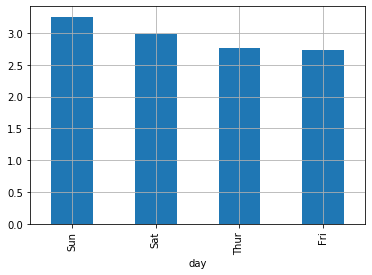

In [35]:
# day라는 컬럼을 기준으로 요일별 팁의 평균
#1.
tipdf.groupby('day')[['tip']].mean()
tipdf.groupby('day')['tip'].agg(['mean'])

#2.
tip_group = tipdf.groupby('day')
tip_group['tip'].mean()

#3.
tip_group['tip'].mean().sort_values(ascending=False)

#4.
tip_group['tip'].mean().sort_values(ascending=False).plot(kind='bar', grid=True)
plt.show()

In [36]:
# 이중으로 그룹핑 가능하다..(성별로 그룹핑 하고 나중에 다시 흡연/비흡연으로 그룹핑)
tip_group2 = tipdf.groupby(['sex', 'smoker'])
tip_group2.mean()

total_bill       tip      size
sex    smoker                                
Female No       18.105185  2.773519  2.592593
       Yes      17.977879  2.931515  2.242424
Male   No       19.791237  3.113402  2.711340
       Yes      22.284500  3.051167  2.500000

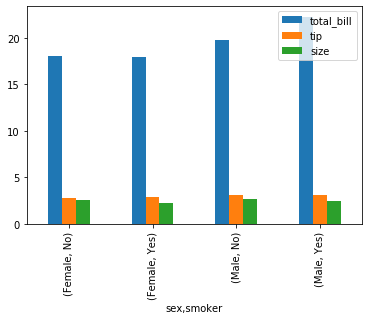

In [37]:
tip_group2.mean().plot(kind='bar')
plt.show()

### 알아두어야 할 함수들

In [39]:
'''
1. unique()
중복된 것은 걸러버리고 중복되지 않은값만 출력
SQL에서 distinct와 동일한 기능
'''
df1['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [40]:
'''
2. describe()
데이타에 대한 간단한 설명...
간단한 통계자료를 내준다.
숫자로서 가능한 데이타만 출력
'''
df1.describe()
#df1.info()
#std : 표준편차, 25% : 4분위 상위 25%, ...

,CountA,CountB
count,8.000000,8.00000
mean,5.875000,4.00000
std,3.044316,2.56348
min,1.000000,1.00000
25%,3.750000,2.75000
50%,6.500000,3.00000
75%,8.250000,5.25000
max,9.000000,9.00000


In [45]:
'''
3. sum()...숫자데이타에만 적용...mean()
4. count()...값의 갯수
5. value_counts()...각각 해당 컬럼에서 그 값이 몇번 나왔는지 확인할때 사용
'''
df1.groupby('Gender').sum()
df1.groupby('Smoking').count()
df1['Smoking'].value_counts()

Smoker        4
Non-Smoker    4
Name: Smoking, dtype: int64

In [47]:
'''
6. apply
판다스에서 내가 만들어서 함수를 작성...그걸 적용시킬때 사용하는 함수
판다스에서 제공하지 않는 함수를 내가 만들어서 적용할려면 사용
'''
def plus(x):
    return x + 1001

df1['CountA'].apply(plus)

0    1010
1    1010
2    1005
3    1009
4    1009
5    1002
6    1006
7    1004
Name: CountA, dtype: int64

In [52]:
'''
7. 
컬럼확인 | 인덱스 확인 | 컬럼명 수정
'''
df1.columns
# df1.info()
# df1.index
df1.columns = ['가', '나', '다', '라']
df1

,가,나,다,라
0,Female,Smoker,9,6
1,Male,Smoker,9,3
2,Female,Smoker,4,3
3,Male,Non-Smoker,8,3
4,Female,Non-Smoker,8,2
5,Male,Non-Smoker,1,1
6,Female,Non-Smoker,5,9
7,Female,Smoker,3,5


### Pivot Tables

In [ ]:
'''
pivot_table 함수를 사용해서
DataFrame의 데이타를 Reshape 한다.
'''

In [53]:
data = {
    "도시": ["서울", "서울", "서울", "부산", "부산", "부산", "인천", "인천"],
    "연도": ["2015", "2010", "2005", "2015", "2010", "2005", "2015", "2010"],
    "인구": [990431, 963148, 976254, 344875, 333231, 300231, 289056, 257812],
    "지역": ["수도권", "수도권", "수도권", "경상권", "경상권", "경상권", "수도권", "수도권"]
}
df2 = DataFrame(data)
df2

,도시,연도,인구,지역
0,서울,2015,990431,수도권
1,서울,2010,963148,수도권
2,서울,2005,976254,수도권
3,부산,2015,344875,경상권
4,부산,2010,333231,경상권
5,부산,2005,300231,경상권
6,인천,2015,289056,수도권
7,인천,2010,257812,수도권


In [66]:
df2.pivot_table(values=['인구'], index=['도시'], columns=['연도'])
df2.pivot_table('인구', index='도시', columns='연도')
df2.pivot_table('인구', index='도시', columns='연도', margins=True)

연도,2005,2010,2015,All
도시,,,,
부산,300231.0,333231.000000,344875.0,326112.333333
서울,976254.0,963148.000000,990431.0,976611.000000
인천,NaN,257812.000000,289056.0,273434.000000
All,638242.5,518063.666667,541454.0,556879.750000


In [67]:
df2['인구'].mean()

556879.75

In [69]:
df2.pivot_table(['인구'], index=['연도', '도시'])

인구
연도   도시        
2005 부산  300231
     서울  976254
2010 부산  333231
     서울  963148
     인천  257812
2015 부산  344875
     서울  990431
     인천  289056

### 실전 데이타 Pivot_Table 응용

In [70]:
tipdf = pd.read_csv('../data/tips.csv')
tipdf.head(1)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2.0


In [75]:
'''
분석의 목표는 식사대금 대비 팁의 비율이 어떤 경우에 가장 높아지는지를 알고싶다
우선 식사대금과 팁의 비율을 나타내는 컬럼을 하나 추가
tip_pct
'''
tipdf['tip_pct'] = tipdf['tip'] / tipdf['total_bill']
tipdf.tail()

tipdf.dropna(inplace=True)
tipdf.tail()

tipdf.describe()
tipdf.info()
tipdf

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244 entries, 0 to 243
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    float64
 7   tip_pct     244 non-null    float64
dtypes: float64(4), object(4)
memory usage: 17.2+ KB


,total_bill,tip,sex,smoker,day,time,size,tip_pct
0,16.99,1.01,Female,No,Sun,Dinner,2.0,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3.0,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3.0,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2.0,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4.0,0.146808
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3.0,0.203927
240,27.18,2.00,Female,Yes,Sat,Dinner,2.0,0.073584
241,22.67,2.00,Male,Yes,Sat,Dinner,2.0,0.088222
242,17.82,1.75,Male,No,Sat,Dinner,2.0,0.098204


In [78]:
tipdf.pivot_table(index='day', aggfunc='mean').round(2) #소수점 3번째 자리에서 반올림

,size,tip,tip_pct,total_bill
day,,,,
Fri,2.11,2.73,0.17,17.15
Sat,2.52,2.99,0.15,20.44
Sun,2.84,3.26,0.17,21.41
Thur,2.45,2.77,0.16,17.68


In [80]:
tipdf.pivot_table(index=['sex', 'smoker']).round(2)

size   tip  tip_pct  total_bill
sex    smoker                                 
Female No      2.59  2.77     0.16       18.11
       Yes     2.24  2.93     0.18       17.98
Male   No      2.71  3.11     0.16       19.79
       Yes     2.50  3.05     0.15       22.28

In [83]:
# tipdf.pivot_table(values, index=, columns=)
'''
index : 그룹핑 기준
columns : 컬럼값
values : index와 columns 사이의 필드를 채우는 값
'''
tipdf.pivot_table(['total_bill', 'tip'], index=['sex', 'day'], columns='smoker')

tip           total_bill           
smoker             No       Yes         No        Yes
sex    day                                           
Female Fri   3.125000  2.682857  19.365000  12.654286
       Sat   2.724615  2.868667  19.003846  20.266667
       Sun   3.329286  3.500000  20.824286  16.540000
       Thur  2.459600  2.990000  16.014400  19.218571
Male   Fri   2.500000  2.741250  17.475000  20.452500
       Sat   3.256563  2.879259  19.929063  21.837778
       Sun   3.115349  3.521333  20.403256  26.141333
       Thur  2.941500  3.058000  18.486500  19.171000

In [88]:
# tip을 알고싶다... 성별로 그룹핑, 컬럼은 흡연여부..count(), 마진
# tipdf.pivot_table('tip', index='sex', columns='smoker', aggfunc='count', margins=True)
tipdf.pivot_table('tip', 'sex', 'smoker', aggfunc='count', margins=True)

smoker,No,Yes,All
sex,,,
Female,54,33,87
Male,97,60,157
All,151,93,244


#### 문제 1
    - 성별에 따른 평균 팁비율

In [96]:
# tipdf.pivot_table('tip_pct', 'sex', aggfunc='mean')
tipdf.pivot_table('tip_pct', 'sex')

tipdf.groupby('sex')[['tip_pct']].mean()
tipdf.groupby('sex')['tip_pct'].agg(['mean'])

,mean
sex,
Female,0.166491
Male,0.157651


### 문제 2
    - 성별과 흡연여부에 따른 평균팁비율 (pivot_table, groupby, mean, agg, aggfunc)

In [101]:
tipdf.pivot_table('tip_pct', index=['sex', 'smoker'])
tipdf.pivot_table('tip_pct', index=['sex', 'smoker'], aggfunc='mean')

tipdf.groupby(['sex', 'smoker'])[['tip_pct']].mean()
tipdf.groupby(['sex', 'smoker'])['tip_pct'].agg(['mean'])

mean
sex    smoker          
Female No      0.156921
       Yes     0.182150
Male   No      0.160669
       Yes     0.152771

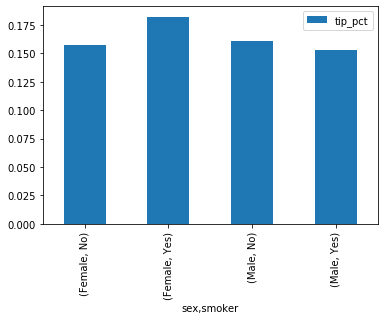

In [102]:
tipdf.pivot_table('tip_pct', index=['sex', 'smoker']).plot(kind='bar')
plt.show()